# Projeto SuperComputação 2024.1

## Otimização de Rotas de Veículos (_Vehicle Routing Problem_ - VRP)

**Objetivo:**

Desenvolver uma aplicação em C++ que otimize as rotas de uma frota de veículos destinados à entrega de produtos a diversos clientes, buscando minimizar o custo total das rotas.


**Descrição:**

Você está encarregado de criar uma solução computacional para o problema de Otimização de Rotas de Veículos (VRP) para uma empresa de logística. A empresa possui uma frota de veículos que são usados para entregar produtos a uma série de clientes. Cada veículo tem uma capacidade de carga máxima, e cada cliente tem uma demanda específica que deve ser atendida. O objetivo é determinar as rotas ótimas para os veículos, de forma que todos os clientes sejam atendidos, respeitando as restrições de capacidade dos veículos, e minimizando o custo total das entregas.


**Restrições e Requisitos:**
1. **Capacidade dos Veículos:** Cada veículo tem uma capacidade máxima de carga que não pode ser excedida.
2. **Demanda dos Clientes:** Cada cliente tem uma demanda específica que deve ser completamente atendida por um único veículo.
3. **Custo da Rota:** Cada rota possui um custo, que simboliza o cômputo agregado da distância percorrida, do tempo de entrega, e do consumo de combustível. O objetivo é minimizar o custo total.
4. **Número máximo de visitas por rota:** Cada rota pode visitar um número máximo de cidades.
5. **Ponto de Partida e Chegada:** Todos os veículos começam e terminam suas rotas no depósito da empresa.


**Desafios Computacionais:**

- O VRP é um problema NP-difícil, o que significa que sua complexidade computacional cresce exponencialmente com o aumento do número de clientes e veículos.
- A busca exaustiva por todas as possíveis combinações de rotas torna-se impraticável para instâncias maiores do problema.


**Composição da Solução:**
1. Implementação de um algoritmo de _busca global_ para o problema (força bruta);
2. Implementação de alguma solução aproximada (_heurística_ ou _busca local_);
3. Implementação de 2 soluções paralelizadas, sendo:

  a. _Paralelização com Threads OpenMP_: Utilizar threads e a biblioteca OpenMP para paralelizar o algoritmo desenvolvido, com o objetivo de reduzir o tempo de execução. Analisar e implementar a paralelização de componentes do algoritmo que possam se beneficiar da execução concorrente, como a geração de soluções iniciais ou a busca local.

  b. _Paralelização e Distribuição do Processamento com MPI_: Implementar uma versão do algoritmo que utilize a interface de passagem de mensagens MPI para distribuir o processo de busca de soluções em múltiplos processos, possivelmente executando em diferentes nós de um cluster. A estratégia deve permitir a exploração paralela do espaço de soluções e a troca eficiente de informações entre os processos.



**Entregáveis:**

1. **Código Fonte:** Código fonte em C++ comentado e organizado.
2. **Relatório:** Um relatório descrevendo a abordagem utilizada, incluindo descrição das heurísticas e métodos de busca local, bem como as estratégias de paralelização adotadas.
3. **Análise de Desempenho:** Uma análise de desempenho da solução proposta, incluindo tempos de execução e qualidade das soluções encontradas, com base em instâncias de teste de diferentes tamanhos.
4. **Instruções de Uso:** Breve documentação sobre como compilar e executar a aplicação, incluindo exemplos de uso.


**DICA**:
Não deixe de estudar os exemplos deste link https://vrpy.readthedocs.io/en/master/examples.html, para entender como gerar a avaliar soluções para o problema. Compare sua solução com a solução desta biblioteca!

### GERAÇÃO DE INSTÂNCIAS DO PROBLEMA

Execute o código abaixo algumas vezes gerando instâncias de tamanhos e complexidades distintas. Você deve experimentar alterações de:
- **num_nos**: número de cidades a serem visitados;
- **probabilidade**: a probabilidade de ser criada uma rota direta entre 2 cidades;


**Aqui, é necessário, previamente, criar uma pasta com o nome `grafos`.**

In [173]:
import random
# from networkx import set_node_attributes

def gerar_dicionario_demandas(N):
    """
    Gera um dicionário onde a chave é um int de 1 até N e o valor é um inteiro aleatório de 1 até 10.

    :param N: Número máximo para as chaves do dicionário.
    :return: Dicionário com chaves de 1 até N e valores inteiros aleatórios de 1 até 10.
    """
    return {i: random.randint(1, 10) for i in range(1, N)}


def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    """
    Gera um grafo para o problema de otimização de rotas de veículos.

    :param num_nos: Número de nós no grafo, incluindo o depósito.
    :param max_peso: Peso máximo para as arestas do grafo.
    :param probabilidade: Probabilidade de criar uma rota entre duas cidades.
    :return: Um dicionário representando o grafo onde as chaves são tuplas representando as arestas (nó1, nó2)
             e os valores são os pesos dessas arestas.
    """
    grafo = {}
    # Gerar pesos para arestas entre o depósito e outros nós
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]  # Assume que a distância de volta ao depósito é a mesma

    # Gerar pesos para arestas entre todos os outros pares de nós
    for i in range(1, num_nos+1):
        for j in range(i+1, num_nos):
            if random.random() > (1 - probabilidade):  # Verifica a probabilidade
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso

    return grafo

############################################
#             Exemplo de uso
############################################
num_nos = 11                                  # Número total de nós incluindo o depósito
demandas = gerar_dicionario_demandas(num_nos)  # Gera as demandas para cada nó
grafo = gerar_entradas_grafo(num_nos, probabilidade=0.75)          # Gera o grafo que representa os locais e custos entre eles

# Salva o grafo em um arquivo TXT
with open('grafos/grafo_11.txt', 'w') as arquivo:
  arquivo.write(str(num_nos) + "\n")    # Número de nós, incluindo depósito
  for local, demanda in demandas.items():
    linha = f"{local} {demanda}\n"      # Par LOCAL DEMANDA
    arquivo.write(linha)

  arquivo.write(str(len(grafo)) + "\n") # Número de arestas
  for aresta, peso in grafo.items():
    linha = f"{aresta[0]} {aresta[1]} {peso}\n" # Trio: ORIGEM DESTINO CUSTO
    arquivo.write(linha)


### GERAÇÃO DE SOLUÇÕES

Instale a biblioteca [VRPy](https://vrpy.readthedocs.io/en/latest/getting_started.html) para resolver problemas de otimização de rotas.

Para cada instância do problema gerada, execute este código para gerar a solução esperada.

Não deixe de estudar a documentação da biblioteca! Especialmente este link: https://vrpy.readthedocs.io/en/latest/examples.html#a-simple-example

Aqui você pode gerar soluções diferentes alterando:
- **load_capacity**: a quantidade e capacidade de veículos;
- **num_stops**: o número máximo de paradas numa rota;

In [169]:
!pip install vrpy

In [167]:
from networkx import DiGraph, set_node_attributes
from vrpy import VehicleRoutingProblem


def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        # Lê o número de nós
        N = int(arquivo.readline().strip())-1

        # Lê as demandas dos nós
        demandas = {}
        for _ in range(N):
            linha = arquivo.readline().strip().split()
            id_no, demanda = int(linha[0]), int(linha[1])
            demandas[id_no] = demanda

        # Lê o número de arestas
        K = int(arquivo.readline().strip())

        # Lê as arestas
        arestas = []
        for _ in range(K):
            linha = arquivo.readline().strip().split()
            origem, destino, peso = int(linha[0]), int(linha[1]), int(linha[2])
            arestas.append((origem, destino, peso))

    return demandas, arestas

############################################
#             Usando a funcao
############################################
caminho_arquivo = 'grafos/grafo_03.txt'
demandas, arestas = ler_arquivo_grafo(caminho_arquivo)

G = DiGraph()
for inicio, fim, custo in arestas:
    if inicio==0: inicio="Source"
    if fim==0: fim="Sink"
    G.add_edge(inicio, fim, cost=custo)

set_node_attributes(G, values=demandas, name="demand")

prob = VehicleRoutingProblem(G, load_capacity=15)  # Pode alterar a capacidade
prob.num_stops = 5                                 # Pode alterar o número máximo de paradas
prob.solve()
# Lista para armazenar os resultados dos problemas

In [150]:
prob.best_routes

{1: ['Source', 8, 'Sink'],
 2: ['Source', 4, 9, 'Sink'],
 3: ['Source', 1, 2, 7, 'Sink'],
 4: ['Source', 3, 6, 'Sink'],
 5: ['Source', 5, 'Sink']}

In [151]:
prob.best_value

600

In [152]:
prob.best_routes_cost

{1: 68, 2: 163, 3: 118, 4: 125, 5: 126}

In [153]:
prob.best_routes_load

{1: 10, 2: 12, 3: 13, 4: 9, 5: 10}

 ### 1. Algoritmo de busca global

Dado o pseudo-código abaixo, implemente-o em C++ e compare (com um gráfico) seu tempo de execução em função de diferentes tamanhos de entrada. Note que ele NÃO ESTÁ COMPLETO!

```cpp
Função ResolverVRPComDemanda(Locais, Demanda, C):
    // Locais: Lista de locais para entrega (excluindo o depósito)
    // Demanda: Dicionário mapeando cada local à sua demanda
    // C: Capacidade do veículo
    
    MelhorRota = NULL
    MenorCusto = INFINITO

    // Gera todas as combinações possíveis de rotas considerando a capacidade do veículo
    Combinações = GerarTodasAsCombinações(Locais)
    
    Para cada combinação em Combinações faça:
        Se VerificarCapacidade(combinação, Demanda, C) então:
            CustoAtual = CalcularCusto(combinação)
            Se CustoAtual < MenorCusto então:
                MenorCusto = CustoAtual
                MelhorRota = combinação
                
    Retornar MelhorRota, MenorCusto

Função GerarTodasAsCombinações(Locais):
    // Gera todas as permutações possíveis de locais e agrupa em rotas válidas conforme a capacidade
    // Esta função é bastante complexa, pois precisa considerar todas as subdivisões possíveis dos locais em rotas que atendam à capacidade do veículo
    // Retorna uma lista de combinações válidas
    Retornar combinações

Função VerificarCapacidade(Rota, Demanda, C):
    // Verifica se a demanda total da rota não excede a capacidade do veículo
    CargaTotal = 0
    Para cada local em Rota faça:
        CargaTotal += Demanda[local]
    Se CargaTotal > C então:
        Retornar Falso
    Senão:
        Retornar Verdadeiro

Função CalcularCusto(Rota):
    // Calcula o custo de uma rota com base na distância, tempo ou outro critério
    // O custo pode depender de fatores como a distância total percorrida, o número de veículos necessários, entre outros
    Retornar custo

// Início do programa
// Define os locais, suas demandas e a capacidade do veículo
Locais = [...]
Demanda = {...}
Capacidade = C

MelhorRota, MenorCusto = ResolverVRPComDemanda(Locais, Demanda, Capacidade)
Exibir "A melhor rota é:", MelhorRota, "com custo total de:", MenorCusto
```

A estratégia para encontrar a rota ótima em um problema de roteamento de veículos (CVRP) é implementada na classe RouteFinder, que utiliza um método de busca recursiva para explorar todas as possíveis rotas. A classe Network carrega a configuração do grafo a partir de um arquivo especificado na linha de comando, que inclui os nós, suas demandas e as arestas com seus custos associados. O método discoverOptimalRoute inicia a busca a partir do nó de origem (0), gerenciando a capacidade restante do veículo e o número de visitas. A função findRoutes é chamada recursivamente para construir todas as rotas possíveis, armazenando as soluções viáveis em um vetor. Após a busca, a rota com o menor custo é selecionada e impressa. Além disso, o tempo de execução do processo é medido utilizando a biblioteca <chrono> e, em seguida, salvo em um arquivo de texto chamado "ex1_time.txt" com precisão de seis casas decimais, permitindo assim a análise de desempenho da execução.

**A princípio, os dados para plot nos gráficos seriam retirados dos arquivos txt, mas preferiu-se apenas anotar a partir do output dos códigos. Portanto, faz-se necessário criar os arquivos `ex1_time.txt` e `execution_time.txt` previamente, para não ter problemas com os códigos, além de `/grafos`.**

In [161]:
%%writefile ex1.cpp
#include <iostream>
#include <vector>
#include <fstream>
#include <tuple>
#include <utility>
#include <map>
#include <algorithm>
#include <chrono>
#include <iomanip> // Para configurar a precisão ao escrever no arquivo

// const std::string graph = "grafo.txt";

class Node {
public:
    int id;
    int requirement;
};

bool existsInVector(const std::vector<int>& vec, int value) {
    return std::find(vec.begin(), vec.end(), value) != vec.end();
}

class Network {
public:
    int total_nodes;
    std::vector<Node> nodes;
    int total_edges;
    std::map<int, std::vector<std::pair<int, int>>> adjacency_list;

    void loadFromFile(const std::string& graph_file) {
        std::ifstream file(graph_file);
        if (!file.is_open()) {
            std::cerr << "Erro ao abrir o arquivo" << std::endl;
            return;
        }

        file >> total_nodes;
        for (int i = 1; i < total_nodes; ++i) {
            Node node;
            file >> node.id >> node.requirement;
            nodes.push_back(node);
        }

        file >> total_edges;
        int from, to, weight;
        for (int i = 0; i < total_edges; ++i) {
            file >> from >> to >> weight;
            adjacency_list[from].emplace_back(to, weight);
        }

        file.close();

        std::cout << "Informações das Cidades:" << std::endl;
        for (const auto& node : nodes) {
            std::cout << "Cidade ID: " << node.id << " | Necessidade: " << node.requirement << std::endl;
        }

        std::cout << std::endl;

        std::cout << "Mapa de Rotas:" << std::endl;
        for (const auto& edge_list : adjacency_list) {
            std::cout << "Origem " << edge_list.first << " -> ";
            for (const auto& edge : edge_list.second) {
                std::cout << "Destino " << edge.first << " (Custo: " << edge.second << ") ";
            }
            std::cout << std::endl;
        }
        std::cout << std::endl;
    }

    int getRequirement(int node_id) const {
        for (const auto& node : nodes) {
            if (node.id == node_id) {
                return node.requirement;
            }
        }
        return 0;
    }

    void updateRequirement(int node_id, int new_requirement) {
        for (auto& node : nodes) {
            if (node.id == node_id) {
                node.requirement = new_requirement;
                return;
            }
        }
    }

    int totalRequirements() const {
        int total = 0;
        for (const auto& node : nodes) {
            total += node.requirement;
        }
        return total;
    }
};

class RouteFinder {
public:
    Network network;
    int max_capacity;
    int max_visits;

    RouteFinder(Network net, int cap, int visits) : network(net), max_capacity(cap), max_visits(visits) {}

    void findRoutes(
        int cost, int current_node, int remaining_capacity, int visited_count,
        std::vector<int> visited_nodes,
        std::vector<std::tuple<std::vector<int>, int>>& solutions) {

        int temp_node = current_node;
        std::vector<int> temp_visited_nodes;
        auto original_requirements = network.nodes;

        for (const auto& edge : network.adjacency_list[temp_node]) {
            int next_node = edge.first;
            int travel_cost = edge.second;

            int node_requirement = network.getRequirement(next_node);

            if (next_node != 0 && (visited_count + 1 > max_visits || remaining_capacity - node_requirement <= 0)) {
                continue;
            }

            if (next_node == 0) {
                temp_visited_nodes = visited_nodes;
                temp_visited_nodes.push_back(next_node);


                if (network.totalRequirements() == 0) {
                    std::tuple<std::vector<int>, int> solution = std::make_tuple(temp_visited_nodes, cost + travel_cost);
                    solutions.push_back(solution);
                    return;
                }

                findRoutes(cost + travel_cost, next_node, max_capacity, 0, temp_visited_nodes, solutions);
            } else {
                if (node_requirement != 0 && !existsInVector(temp_visited_nodes, next_node)) {
                    temp_visited_nodes = visited_nodes;
                    temp_visited_nodes.push_back(next_node);
                    network.updateRequirement(next_node, 0);

                    findRoutes(cost + travel_cost, next_node, remaining_capacity - node_requirement, visited_count + 1, temp_visited_nodes, solutions);
                }
            }

            network.nodes = original_requirements;
        }
    }

    void discoverOptimalRoute() {
        int remaining_capacity = max_capacity;
        int total_cost = 0, starting_node = 0, visit_count = 0;
        std::vector<int> nodes_visited = {0};

        std::vector<std::tuple<std::vector<int>, int>> solutions;

        findRoutes(total_cost, starting_node, remaining_capacity, visit_count, nodes_visited, solutions);

        std::vector<int> optimal_route;
        int minimal_cost = 999999;

        for (const auto& solution : solutions) {
            const std::vector<int>& route = std::get<0>(solution);
            int cost = std::get<1>(solution);

            if (cost < minimal_cost) {
                optimal_route = route;
                minimal_cost = cost;
            }
        }

        std::cout << "Rota a ser seguida:" << std::endl;
        for (size_t i = 0; i < optimal_route.size(); ++i) {
            std::cout << "Passo " << i + 1 << ": Cidade " << optimal_route[i] << std::endl;
        }
        std::cout << "Total de passos: " << optimal_route.size() << std::endl;
        std::cout << std::endl;

        std::cout << "Detalhamento do custo:" << std::endl;
        std::cout << "Custo total para percorrer a rota ótima: " << minimal_cost << std::endl;
        std::cout << "Isso inclui os custos de viagem entre todas as cidades na rota." << std::endl;
    }
};

int main(int argc, char* argv[]) {
    Network network;
    network.loadFromFile(argv[1]);

    RouteFinder route_finder(network, 25, 10);

    // Iniciando a contagem de tempo
    auto start_time = std::chrono::high_resolution_clock::now();

    // Chamando o método para descobrir a rota ótima
    route_finder.discoverOptimalRoute();

    // Finalizando a contagem de tempo
    auto end_time = std::chrono::high_resolution_clock::now();

    // Calculando o tempo decorrido em segundos com precisão
    std::chrono::duration<double> duration = end_time - start_time;
    double execution_time = duration.count();

    // Salvando o tempo de execução em um arquivo de texto
    std::ofstream time_file("ex1_time.txt", std::ios_base::app); // Abre o arquivo em modo de apêndice
    if (time_file.is_open()) {
        time_file << std::fixed << std::setprecision(6) << "Tempo de execução: " << execution_time << " segundos" << std::endl;
        time_file.close();
        std::cout << "Tempo de execução de " << execution_time << "s salvo em 'ex1_time.txt'" << std::endl;
    } else {
        std::cerr << "Erro ao abrir o arquivo para salvar o tempo de execução." << std::endl;
    }

    return 0;
}

Overwriting ex1.cpp


In [162]:
!g++ ex1.cpp -o ex1

In [174]:
!./ex1 grafos/grafo_03.txt
!./ex1 grafos/grafo_05.txt
!./ex1 grafos/grafo_07.txt
!./ex1 grafos/grafo_09.txt
!./ex1 grafos/grafo_11.txt

Informações das Cidades:
Cidade ID: 1 | Necessidade: 1
Cidade ID: 2 | Necessidade: 8

Mapa de Rotas:
Origem 0 -> Destino 1 (Custo: 17) Destino 2 (Custo: 50) 
Origem 1 -> Destino 0 (Custo: 17) Destino 2 (Custo: 43) 
Origem 2 -> Destino 0 (Custo: 50) 

Rota a ser seguida:
Passo 1: Cidade 0
Passo 2: Cidade 1
Passo 3: Cidade 2
Passo 4: Cidade 0
Total de passos: 4

Detalhamento do custo:
Custo total para percorrer a rota ótima: 110
Isso inclui os custos de viagem entre todas as cidades na rota.
Tempo de execução de 7.9428e-05 salvo em 'ex1_time.txt'
Informações das Cidades:
Cidade ID: 1 | Necessidade: 5
Cidade ID: 2 | Necessidade: 3
Cidade ID: 3 | Necessidade: 5
Cidade ID: 4 | Necessidade: 3

Mapa de Rotas:
Origem 0 -> Destino 1 (Custo: 84) Destino 2 (Custo: 41) Destino 3 (Custo: 28) Destino 4 (Custo: 12) 
Origem 1 -> Destino 0 (Custo: 84) Destino 2 (Custo: 8) 
Origem 2 -> Destino 0 (Custo: 41) Destino 3 (Custo: 4) Destino 4 (Custo: 7) 
Origem 3 -> Destino 0 (Custo: 28) 
Origem 4 -> Destino

### 2. Solução aproximada

Para problemas complexos as heurísticas são ferramentas essenciais, pois oferecem soluções aproximadas em tempo razoável, especialmente quando o problema é grande demais para abordagens de força bruta ou métodos exatos. Heurísticas não garantem a melhor solução possível, mas frequentemente encontram soluções muito boas com um esforço computacional significativamente menor.

Algumas das heurísticas e métodos meta-heurísticos mais comuns para o VRP incluem:

  - _Heurística de Inserção Mais Próxima_: Começa com uma rota contendo apenas o depósito e, em seguida, iterativamente insere o cliente mais próximo em sua posição de menor custo até que todos os clientes sejam incluídos. Esta abordagem é simples e relativamente rápida, mas pode não encontrar a melhor solução possível.
  - _Heurística de Clarke e Wright (Economias)_: Uma das heurísticas mais conhecidas para o VRP, que começa com cada cliente em sua própria rota e, em seguida, progressivamente mescla rotas que resultam nas maiores "economias", ou seja, reduções no custo total da rota. Essa abordagem tenta equilibrar o custo de visitar cada cliente com o custo de conectar rotas.
  - _Algoritmos Genéticos_: Uma classe de métodos de busca e otimização baseados nos princípios de seleção natural e genética. Eles usam operações como seleção, cruzamento e mutação para evoluir uma população de soluções ao longo do tempo, em busca da melhor solução possível.

Implemente uma das heurísticas citadas, ou elabore outra solução aproximada, que dê uma solução em tempo razoável para o problema. Aqui, além de implementar o algoritmo, é importante que você descreva brevemente sua estratégia de solução no relatório.

Mesmo cortes mais simples do espaço de busca estão valendo, por exemplo, considerando que há um limite máximo de visitas em cada rota, podemos de cara cortar as combinações de cidades que ultrapassam esse limite. Podemos, ainda, estabelecer um limite mínimo, para evitar rotas pequenas.





### Heurística escolhida: Clarke e Wright

No código fornecido, a estratégia de resolução do problema de roteamento de veículos (CVRP) utilizando o método de Clarke e Wright começa com a leitura dos dados de um arquivo de grafo. O a

rquivo especifica os nós, suas demandas e as arestas com seus respectivos custos. Após carregar esses dados, o algoritmo de Clarke e Wright calcula as economias (savings) para cada par de nós, que representam a redução no custo total ao unir duas rotas em uma. Essas economias são ordenadas de forma decrescente, e o algoritmo tenta unir rotas consecutivamente se a união não violar as restrições de capacidade do veículo e o número máximo de paradas permitido. Cada união bem-sucedida reduz a necessidade de retornar ao depósito entre visitas aos nós, otimizando o custo total da rota. O processo continua até que todas as economias viáveis sejam aplicadas. No final, o código imprime as rotas resultantes, o custo total de cada rota e salva o tempo de execução em um arquivo de texto para análise posterior. A paralelização do cálculo de economias e a verificação das condições de união de rotas são feitas para melhorar a eficiência computacional.

In [178]:
%%writefile ex2.cpp

#include <iostream>
#include <vector>
#include <iomanip>
#include <fstream>
#include <tuple>
#include <utility>
#include <map>
#include <algorithm>
#include <chrono>

// const std::string graph = "grafo.txt";

class Node {
public:
    int id;
    int requirement;
};

bool existsInVector(const std::vector<int>& vec, int value) {
    return std::find(vec.begin(), vec.end(), value) != vec.end();
}

class Network {
public:
    int total_nodes;
    std::vector<Node> nodes;
    int total_edges;
    std::map<int, std::vector<std::pair<int, int>>> adjacency_list;
    std::vector<std::vector<int>> distance_matrix;

    void loadFromFile(const std::string& graph_file) {
        std::ifstream file(graph_file);
        if (!file.is_open()) {
            std::cerr << "Erro ao abrir o arquivo" << std::endl;
            return;
        }

        file >> total_nodes;
        nodes.resize(total_nodes);
        distance_matrix.resize(total_nodes, std::vector<int>(total_nodes, 0));

        for (int i = 1; i < total_nodes; ++i) {
            file >> nodes[i].id >> nodes[i].requirement;
        }

        file >> total_edges;
        int from, to, weight;
        for (int i = 0; i < total_edges; ++i) {
            file >> from >> to >> weight;
            adjacency_list[from].emplace_back(to, weight);
            distance_matrix[from][to] = weight;
            distance_matrix[to][from] = weight; // Assuming undirected graph
        }

        file.close();

        std::cout << "Informações das Cidades:" << std::endl;
        for (const auto& node : nodes) {
            std::cout << "Cidade ID: " << node.id << " | Necessidade: " << node.requirement << std::endl;
        }

        std::cout << std::endl;

        std::cout << "Mapa de Rotas:" << std::endl;
        for (const auto& edge_list : adjacency_list) {
            std::cout << "Origem " << edge_list.first << " -> ";
            for (const auto& edge : edge_list.second) {
                std::cout << "Destino " << edge.first << " (Custo: " << edge.second << ") ";
            }
            std::cout << std::endl;
        }
        std::cout << std::endl;
    }

    int getRequirement(int node_id) const {
        for (const auto& node : nodes) {
            if (node.id == node_id) {
                return node.requirement;
            }
        }
        return 0;
    }

    void updateRequirement(int node_id, int new_requirement) {
        for (auto& node : nodes) {
            if (node.id == node_id) {
                node.requirement = new_requirement;
                return;
            }
        }
    }

    int totalRequirements() const {
        int total = 0;
        for (const auto& node : nodes) {
            total += node.requirement;
        }
        return total;
    }
};

class ClarkeWright {
public:
    Network network;
    int max_capacity;
    int max_visits;

    ClarkeWright(Network net, int cap, int visits) : network(net), max_capacity(cap), max_visits(visits) {}

    void solve() {
        std::vector<std::tuple<int, int, int>> savings;
        for (int i = 1; i < network.total_nodes; ++i) {
            for (int j = i + 1; j < network.total_nodes; ++j) {
                int s_ij = network.distance_matrix[0][i] + network.distance_matrix[0][j] - network.distance_matrix[i][j];
                savings.emplace_back(s_ij, i, j);
            }
        }

        std::sort(savings.begin(), savings.end(), std::greater<std::tuple<int, int, int>>());

        std::vector<std::vector<int>> routes(network.total_nodes);
        std::vector<int> route_demands(network.total_nodes, 0);
        for (int i = 1; i < network.total_nodes; ++i) {
            routes[i] = {0, i, 0};
            route_demands[i] = network.nodes[i].requirement;
        }

        for (const auto& [saving, i, j] : savings) {
            int route_i = findRoute(routes, i);
            int route_j = findRoute(routes, j);

            if (route_i != route_j && route_demands[route_i] + route_demands[route_j] <= max_capacity && routes[route_i].size() + routes[route_j].size() - 2 <= max_visits) {
                mergeRoutes(routes, route_i, route_j, route_demands);
            }
        }

        printSolution(routes, route_demands);
    }

private:
    int findRoute(const std::vector<std::vector<int>>& routes, int node) {
        for (int r = 1; r < routes.size(); ++r) {
            if (std::find(routes[r].begin(), routes[r].end(), node) != routes[r].end()) {
                return r;
            }
        }
        return -1;
    }

    void mergeRoutes(std::vector<std::vector<int>>& routes, int route_i, int route_j, std::vector<int>& route_demands) {
        routes[route_i].pop_back(); // Remove the trailing 0 from route_i
        routes[route_i].insert(routes[route_i].end(), routes[route_j].begin() + 1, routes[route_j].end()); // Merge route_j into route_i
        route_demands[route_i] += route_demands[route_j];
        routes[route_j].clear(); // Clear route_j as it's now merged
    }

    void printSolution(const std::vector<std::vector<int>>& routes, const std::vector<int>& route_demands) {
        int total_cost = 0;
        std::cout << "Rota a ser seguida:" << std::endl;
        for (const auto& route : routes) {
            if (route.size() > 2) { // Valid route
                int route_cost = 0;
                for (size_t i = 0; i < route.size() - 1; ++i) {
                    route_cost += network.distance_matrix[route[i]][route[i + 1]];
                }
                total_cost += route_cost;

                std::cout << "Rota: ";
                for (int node : route) {
                    std::cout << node << " ";
                }
                std::cout << "| Custo da rota: " << route_cost << std::endl;
            }
        }
        std::cout << "Total de passos: " << routes.size() << std::endl;
        std::cout << std::endl;

        std::cout << "Detalhamento do custo:" << std::endl;
        std::cout << "Custo total para percorrer a rota ótima: " << total_cost << std::endl;
        std::cout << "Isso inclui os custos de viagem entre todas as cidades na rota." << std::endl;
    }
};

int main(int argc, char* argv[]) {
    Network network;
    network.loadFromFile(argv[1]);

    ClarkeWright clarke_wright(network, 25, 10);

    // Iniciando a contagem de tempo
    auto start_time = std::chrono::high_resolution_clock::now();

    // Chamando o método para resolver o problema
    clarke_wright.solve();

    // Finalizando a contagem de tempo
    auto end_time = std::chrono::high_resolution_clock::now();

    // Calculando o tempo decorrido em segundos com precisão
    std::chrono::duration<double> duration = end_time - start_time;
    double execution_time = duration.count();

    // Salvando o tempo de execução em um arquivo de texto
    std::ofstream time_file("execution_time.txt", std::ios_base::app); // Abre o arquivo em modo de apêndice
    if (time_file.is_open()) {
        time_file << std::fixed << std::setprecision(6) << "Tempo de execução: " << execution_time << " segundos" << std::endl;
        time_file.close();
        std::cout << "Tempo de execução de " << execution_time << " salvo em 'execution_time.txt'" << std::endl;
    } else {
        std::cerr << "Erro ao abrir o arquivo para salvar o tempo de execução." << std::endl;
    }

    return 0;
}

Overwriting ex2.cpp


In [179]:
!g++ ex2.cpp -o ex2

In [180]:
!./ex2 grafos/grafo_03.txt
!./ex2 grafos/grafo_05.txt
!./ex2 grafos/grafo_07.txt
!./ex2 grafos/grafo_09.txt
!./ex2 grafos/grafo_11.txt

Informações das Cidades:
Cidade ID: 0 | Necessidade: 0
Cidade ID: 1 | Necessidade: 1
Cidade ID: 2 | Necessidade: 8

Mapa de Rotas:
Origem 0 -> Destino 1 (Custo: 17) Destino 2 (Custo: 50) 
Origem 1 -> Destino 0 (Custo: 17) Destino 2 (Custo: 43) 
Origem 2 -> Destino 0 (Custo: 50) 

Rota a ser seguida:
Rota: 0 1 2 0 | Custo da rota: 110
Total de passos: 3

Detalhamento do custo:
Custo total para percorrer a rota ótima: 110
Isso inclui os custos de viagem entre todas as cidades na rota.
Tempo de execução de 4.7136e-05 salvo em 'execution_time.txt'
Informações das Cidades:
Cidade ID: 0 | Necessidade: 0
Cidade ID: 1 | Necessidade: 5
Cidade ID: 2 | Necessidade: 3
Cidade ID: 3 | Necessidade: 5
Cidade ID: 4 | Necessidade: 3

Mapa de Rotas:
Origem 0 -> Destino 1 (Custo: 84) Destino 2 (Custo: 41) Destino 3 (Custo: 28) Destino 4 (Custo: 12) 
Origem 1 -> Destino 0 (Custo: 84) Destino 2 (Custo: 8) 
Origem 2 -> Destino 0 (Custo: 41) Destino 3 (Custo: 4) Destino 4 (Custo: 7) 
Origem 3 -> Destino 0 (Cu

### 3. Soluções paralelizadas

Na abordagem de força bruta para a resolução do problema de otimização de rotas de veículos, a parte mais custosa computacionalmente é a geração e avaliação de todas as permutações possíveis das cidades (ou pontos de entrega).

Esta é também a parte que oferece maior potencial para paralelização. Mas existem outras?

Nesta etapa do projeto você deve realizar 2 implementações paralelas da sua solução, sendo:

- 1 solução baseada em "paralelização local", ou seja, usar threads para extrair o máximo de proveito da máquina que rodará o programa;
- 1 solução baseada em "paralelização global", ou seja, construir uma solução que paraleliza a execução em múltiplas máquinas de um cluster, acelerando ainda mais a execução. Note que seu programa de paralelização global deve também fazer uso de paralelização local. Em outras palavras, você particionará o problema e alocará cada parte em uma máquina; em cada máquina você usará os recursos presentes (cores) para paralelizar ainda mais!


In [187]:
%%writefile ex3_local.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <iomanip> // Para configurar a precisão ao escrever no arquivo
#include <tuple>
#include <utility>
#include <map>
#include <algorithm>
#include <omp.h> // Adicionando a biblioteca OpenMP
#include <chrono>

// const std::string graph = "grafo.txt";

class Node {
public:
    int id;
    int requirement;
};

bool existsInVector(const std::vector<int>& vec, int value) {
    return std::find(vec.begin(), vec.end(), value) != vec.end();
}

class Network {
public:
    int total_nodes;
    std::vector<Node> nodes;
    int total_edges;
    std::map<int, std::vector<std::pair<int, int>>> adjacency_list;
    std::vector<std::vector<int>> distance_matrix;

    void loadFromFile(const std::string& graph_file) {
        std::ifstream file(graph_file);
        if (!file.is_open()) {
            std::cerr << "Erro ao abrir o arquivo" << std::endl;
            return;
        }

        file >> total_nodes;
        nodes.resize(total_nodes);
        distance_matrix.resize(total_nodes, std::vector<int>(total_nodes, 0));

        for (int i = 1; i < total_nodes; ++i) {
            file >> nodes[i].id >> nodes[i].requirement;
        }

        file >> total_edges;
        int from, to, weight;
        for (int i = 0; i < total_edges; ++i) {
            file >> from >> to >> weight;
            adjacency_list[from].emplace_back(to, weight);
            distance_matrix[from][to] = weight;
            distance_matrix[to][from] = weight; // Assuming undirected graph
        }

        file.close();

        std::cout << "Informações das Cidades:" << std::endl;
        for (const auto& node : nodes) {
            std::cout << "Cidade ID: " << node.id << " | Necessidade: " << node.requirement << std::endl;
        }

        std::cout << std::endl;

        std::cout << "Mapa de Rotas:" << std::endl;
        for (const auto& edge_list : adjacency_list) {
            std::cout << "Origem " << edge_list.first << " -> ";
            for (const auto& edge : edge_list.second) {
                std::cout << "Destino " << edge.first << " (Custo: " << edge.second << ") ";
            }
            std::cout << std::endl;
        }
        std::cout << std::endl;
    }

    int getRequirement(int node_id) const {
        for (const auto& node : nodes) {
            if (node.id == node_id) {
                return node.requirement;
            }
        }
        return 0;
    }

    void updateRequirement(int node_id, int new_requirement) {
        for (auto& node : nodes) {
            if (node.id == node_id) {
                node.requirement = new_requirement;
                return;
            }
        }
    }

    int totalRequirements() const {
        int total = 0;
        for (const auto& node : nodes) {
            total += node.requirement;
        }
        return total;
    }
};

class ClarkeWright {
public:
    Network network;
    int max_capacity;
    int max_visits;

    ClarkeWright(Network net, int cap, int visits) : network(net), max_capacity(cap), max_visits(visits) {}

    void solve() {
        std::vector<std::tuple<int, int, int>> savings;
        #pragma omp parallel for schedule(dynamic) // Paralelizando o loop de geração de economias
        for (int i = 1; i < network.total_nodes; ++i) {
            for (int j = i + 1; j < network.total_nodes; ++j) {
                int s_ij = network.distance_matrix[0][i] + network.distance_matrix[0][j] - network.distance_matrix[i][j];
                savings.emplace_back(s_ij, i, j);
            }
        }

        std::sort(savings.begin(), savings.end(), [](const auto& a, const auto& b) { // Ordenando as economias em ordem decrescente
            return std::get<0>(a) > std::get<0>(b);
        });

        std::vector<std::vector<int>> routes(network.total_nodes);
        std::vector<int> route_demands(network.total_nodes, 0);
        #pragma omp parallel for schedule(dynamic) // Paralelizando a inicialização das rotas
        for (int i = 1; i < network.total_nodes; ++i) {
            routes[i] = {0, i, 0};
            route_demands[i] = network.nodes[i].requirement;
        }

        #pragma omp parallel for schedule(dynamic) // Paralelizando o loop principal de mesclagem das rotas
        for (size_t idx = 0; idx < savings.size(); ++idx) {
            const auto& [saving, i, j] = savings[idx];
            int route_i = findRoute(routes, i);
            int route_j = findRoute(routes, j);

            if (route_i != route_j && route_demands[route_i] + route_demands[route_j] <= max_capacity && routes[route_i].size() + routes[route_j].size() - 2 <= max_visits) {
                mergeRoutes(routes, route_i, route_j, route_demands);
            }
        }

        printSolution(routes, route_demands);
    }

private:
    int findRoute(const std::vector<std::vector<int>>& routes, int node) {
        for (int r = 1; r < routes.size(); ++r) {
            if (std::find(routes[r].begin(), routes[r].end(), node) != routes[r].end()) {
                return r;
            }
        }
        return -1;
    }

    void mergeRoutes(std::vector<std::vector<int>>& routes, int route_i, int route_j, std::vector<int>& route_demands) {
        routes[route_i].pop_back(); // Remove o 0 final da rota_i
        routes[route_i].insert(routes[route_i].end(), routes[route_j].begin() + 1, routes[route_j].end()); // Mescla rota_j em rota_i
        route_demands[route_i] += route_demands[route_j];
        routes[route_j].clear(); // Limpa rota_j, já que foi mesclada
    }

    void printSolution(const std::vector<std::vector<int>>& routes, const std::vector<int>& route_demands) {
        int total_cost = 0;
        std::cout << "Rota a ser seguida:" << std::endl;
        for (const auto& route : routes) {
            if (route.size() > 2) { // Rota válida
                int route_cost = 0;
                for (size_t i = 0; i < route.size() - 1; ++i) {
                    route_cost += network.distance_matrix[route[i]][route[i + 1]];
                }
                total_cost += route_cost;

                std::cout << "Rota: ";
                for (int node : route) {
                    std::cout << node << " ";
                }
                std::cout << "| Custo da rota: " << route_cost << std::endl;
            }
        }
        std::cout << "Total de passos: " << routes.size() << std::endl;
        std::cout << std::endl;

        std::cout << "Detalhamento do custo:" << std::endl;
        std::cout << "Custo total para percorrer a rota ótima: " << total_cost << std::endl;
        std::cout << "Isso inclui os custos de viagem entre todas as cidades na rota." << std::endl;
    }
};

int main(int argc, char* argv[]) {
    Network network;
    network.loadFromFile(argv[1]);

    ClarkeWright clarke_wright(network, 25, 10);

    // Iniciando a contagem de tempo
    auto start_time = std::chrono::high_resolution_clock::now();

    // Chamando o método para resolver o problema
    clarke_wright.solve();

    // Finalizando a contagem de tempo
    auto end_time = std::chrono::high_resolution_clock::now();

    // Calculando o tempo decorrido em segundos com precisão
    std::chrono::duration<double> duration = end_time - start_time;
    double execution_time = duration.count();

    // Salvando o tempo de execução em um arquivo de texto
    std::ofstream time_file("execution_time.txt", std::ios_base::app); // Abre o arquivo em modo de apêndice
    if (time_file.is_open()) {
        time_file << std::fixed << std::setprecision(6) << "Tempo de execução: " << execution_time << " segundos" << std::endl;
        time_file.close();
        std::cout << "Tempo de execução de " << execution_time << " salvo em 'execution_time.txt'" << std::endl;
    } else {
        std::cerr << "Erro ao abrir o arquivo para salvar o tempo de execução." << std::endl;
    }

    return 0;
}

Overwriting ex3_local.cpp


In [188]:
!g++ ex3_local.cpp -o ex3_local

In [189]:
!./ex3_local grafos/grafo_03.txt
!./ex3_local grafos/grafo_05.txt
!./ex3_local grafos/grafo_07.txt
!./ex3_local grafos/grafo_09.txt
!./ex3_local grafos/grafo_11.txt

Informações das Cidades:
Cidade ID: 0 | Necessidade: 0
Cidade ID: 1 | Necessidade: 1
Cidade ID: 2 | Necessidade: 8

Mapa de Rotas:
Origem 0 -> Destino 1 (Custo: 17) Destino 2 (Custo: 50) 
Origem 1 -> Destino 0 (Custo: 17) Destino 2 (Custo: 43) 
Origem 2 -> Destino 0 (Custo: 50) 

Rota a ser seguida:
Rota: 0 1 2 0 | Custo da rota: 110
Total de passos: 3

Detalhamento do custo:
Custo total para percorrer a rota ótima: 110
Isso inclui os custos de viagem entre todas as cidades na rota.
Tempo de execução de 5.4789e-05 salvo em 'execution_time.txt'
Informações das Cidades:
Cidade ID: 0 | Necessidade: 0
Cidade ID: 1 | Necessidade: 5
Cidade ID: 2 | Necessidade: 3
Cidade ID: 3 | Necessidade: 5
Cidade ID: 4 | Necessidade: 3

Mapa de Rotas:
Origem 0 -> Destino 1 (Custo: 84) Destino 2 (Custo: 41) Destino 3 (Custo: 28) Destino 4 (Custo: 12) 
Origem 1 -> Destino 0 (Custo: 84) Destino 2 (Custo: 8) 
Origem 2 -> Destino 0 (Custo: 41) Destino 3 (Custo: 4) Destino 4 (Custo: 7) 
Origem 3 -> Destino 0 (Cu

**Aqui, foi-se necessário criar os arquivos/pastas `.cpp`, `.slurm`, `/grafos`, `.execution_time.txt` dentro da pasta Scratch, no cluster da disciplina. Com vários testes, o código gerou um arquivo output que está sendo enviado. Também gerou-se um arquivo de erros, porém não está sendo enviado.**

In [217]:
%%writefile ex3_global.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <tuple>
#include <utility>
#include <map>
#include <algorithm>
#include <mpi.h>
#include <chrono>

const std::string graph = "grafo.txt";

class Node {
public:
    int id;
    int requirement;
};

bool existsInVector(const std::vector<int>& vec, int value) {
    return std::find(vec.begin(), vec.end(), value) != vec.end();
}

class Network {
public:
    int total_nodes;
    std::vector<Node> nodes;
    int total_edges;
    std::map<int, std::vector<std::pair<int, int>>> adjacency_list;
    std::vector<std::vector<int>> distance_matrix;

    void loadFromFile(const std::string& graph_file) {
        std::ifstream file(graph_file);
        if (!file.is_open()) {
            std::cerr << "Erro ao abrir o arquivo" << std::endl;
            return;
        }

        file >> total_nodes;
        nodes.resize(total_nodes);
        distance_matrix.resize(total_nodes, std::vector<int>(total_nodes, 0));

        for (int i = 1; i < total_nodes; ++i) {
            file >> nodes[i].id >> nodes[i].requirement;
        }

        file >> total_edges;
        int from, to, weight;
        for (int i = 0; i < total_edges; ++i) {
            file >> from >> to >> weight;
            adjacency_list[from].emplace_back(to, weight);
            distance_matrix[from][to] = weight;
            distance_matrix[to][from] = weight;
        }

        file.close();

        std::cout << "Informações das Cidades:" << std::endl;
        for (const auto& node : nodes) {
            std::cout << "Cidade ID: " << node.id << " | Necessidade: " << node.requirement << std::endl;
        }

        std::cout << std::endl;

        std::cout << "Mapa de Rotas:" << std::endl;
        for (const auto& edge_list : adjacency_list) {
            std::cout << "Origem " << edge_list.first << " -> ";
            for (const auto& edge : edge_list.second) {
                std::cout << "Destino " << edge.first << " (Custo: " << edge.second << ") ";
            }
            std::cout << std::endl;
        }
        std::cout << std::endl;
    }

    int getRequirement(int node_id) const {
        for (const auto& node : nodes) {
            if (node.id == node_id) {
                return node.requirement;
            }
        }
        return 0;
    }

    void updateRequirement(int node_id, int new_requirement) {
        for (auto& node : nodes) {
            if (node.id == node_id) {
                node.requirement = new_requirement;
                return;
            }
        }
    }

    int totalRequirements() const {
        int total = 0;
        for (const auto& node : nodes) {
            total += node.requirement;
        }
        return total;
    }
};

class ClarkeWright {
public:
    Network network;
    int max_capacity;
    int max_visits;

    ClarkeWright(Network net, int cap, int visits) : network(net), max_capacity(cap), max_visits(visits) {}

    void solve() {
        int rank, size;
        MPI_Comm_rank(MPI_COMM_WORLD, &rank);
        MPI_Comm_size(MPI_COMM_WORLD, &size);

        std::vector<std::tuple<int, int, int>> savings;
        for (int i = 1 + rank; i < network.total_nodes; i += size) {
            for (int j = i + 1; j < network.total_nodes; ++j) {
                int s_ij = network.distance_matrix[0][i] + network.distance_matrix[0][j] - network.distance_matrix[i][j];
                savings.emplace_back(s_ij, i, j);
            }
        }


        std::vector<std::tuple<int, int, int>> combined_savings;
        MPI_Allreduce(savings.data(), combined_savings.data(), savings.size(), MPI_INT, MPI_SUM, MPI_COMM_WORLD);

        std::sort(combined_savings.begin(), combined_savings.end(), [](const auto& a, const auto& b) {
            return std::get<0>(a) > std::get<0>(b);
        });

        std::vector<std::vector<int>> routes(network.total_nodes);
        std::vector<int> route_demands(network.total_nodes, 0);
        #pragma omp parallel for schedule(dynamic)
        for (int i = 1; i < network.total_nodes; ++i) {
            routes[i] = {0, i, 0};
            route_demands[i] = network.nodes[i].requirement;
        }

        #pragma omp parallel for schedule(dynamic)
        for (size_t idx = 0; idx < savings.size(); ++idx) {
            const auto& [saving, i, j] = savings[idx];
            int route_i = findRoute(routes, i);
            int route_j = findRoute(routes, j);

            if (route_i != route_j && route_demands[route_i] + route_demands[route_j] <= max_capacity && routes[route_i].size() + routes[route_j].size() - 2 <= max_visits) {
                mergeRoutes(routes, route_i, route_j, route_demands);
            }
        }

        printSolution(routes, route_demands);

    }

private:
    int findRoute(const std::vector<std::vector<int>>& routes, int node) {
        for (int r = 1; r < routes.size(); ++r) {
            if (std::find(routes[r].begin(), routes[r].end(), node) != routes[r].end()) {
                return r;
            }
        }
        return -1;
    }

    void mergeRoutes(std::vector<std::vector<int>>& routes, int route_i, int route_j, std::vector<int>& route_demands) {
        routes[route_i].pop_back();
        routes[route_i].insert(routes[route_i].end(), routes[route_j].begin() + 1, routes[route_j].end());
        route_demands[route_i] += route_demands[route_j];
        routes[route_j].clear();
    }

    void printSolution(const std::vector<std::vector<int>>& routes, const std::vector<int>& route_demands) {
        int total_cost = 0;
        std::cout << "Rota a ser seguida:" << std::endl;
        for (const auto& route : routes) {
            if (route.size() > 2) {
                int route_cost = 0;
                for (size_t i = 0; i < route.size() - 1; ++i) {
                    route_cost += network.distance_matrix[route[i]][route[i + 1]];
                }
                total_cost += route_cost;

                std::cout << "Rota: ";
                for (int node : route) {
                    std::cout << node << " ";
                }
                std::cout << "| Custo da rota: " << route_cost << std::endl;
            }
        }
        std::cout << "Total de passos: " << routes.size() << std::endl;
        std::cout << std::endl;

        std::cout << "Detalhamento do custo:" << std::endl;
        std::cout << "Custo total para percorrer a rota ótima: " << total_cost << std::endl;
        std::cout << "Isso inclui os custos de viagem entre todas as cidades na rota." << std::endl;
    }
};

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    std::vector<std::string> graph_files = {"grafos/grafo_03.txt", "grafos/grafo_05.txt", "grafos/grafo_07.txt", "grafos/grafo_09.txt", "grafos/grafo_11.txt"};

    for (const auto& file : graph_files) {
        Network network;
        network.loadFromFile(file);

        auto start = std::chrono::high_resolution_clock::now();

        ClarkeWright clarke_wright(network, 25, 10);
        clarke_wright.solve();

        auto end = std::chrono::high_resolution_clock::now();

        std::chrono::duration<double> duration = end - start;
        double seconds = duration.count();

        std::ofstream output_file("execution_time_" + file + ".txt");

        std::cout << "Tempo de " << file <<": " << seconds << std::endl;

        output_file << "Tempo de execução de " << file <<": " << seconds << " segundos" << std::endl;
        output_file.close();
    }

    MPI_Finalize();

    return 0;
}

Overwriting ex3_global.cpp


### Compilação no cluster: mpic++ ex3_global.cpp -o ex3_global

In [215]:
%%writefile ex3_global.slurm

#!/bin/bash
#SBATCH --job-name=ex3_global
#SBATCH --output=output_%j.txt
#SBATCH --error=errors_%j.txt
#SBATCH --partition=espec
#SBATCH --nodes=2
#SBATCH --ntasks-per-node=8
#SBATCH --cpus-per-task=1
#SBATCH --mem-per-cpu=500M
#SBATCH --time=0:01:00

num_proc=$((SLURM_NTASKS_PER_NODE * SLURM_NNODES))

mpirun -np $num_proc ./ex3_global

Writing ex3_global.slurm


In [ ]:
# sbatch ex_global.slurm

# OUTPUT_901:
# Tempo grafos/grafo_03.txt: 2.8633e-05	Custo: 134
# Tempo grafos/grafo_05.txt:1.97e-05 Custo: 330
# Tempo grafos/grafo_07.txt:1.8877e-05 Custo: 734
# Tempo grafos/grafo_09.txt:2.614e-05	Custo: 706
# Tempo grafos/grafo_11.txt:2.5055e-05	Custo: 1072

/bin/bash: line 1: ./sbatch: No such file or directory


**_NOTA_**: Compare todas as suas soluções em termos de tempo de execução. Para a mesma entrada, execute-a com cada uma das 4 implementações e compare os tempos de execução.

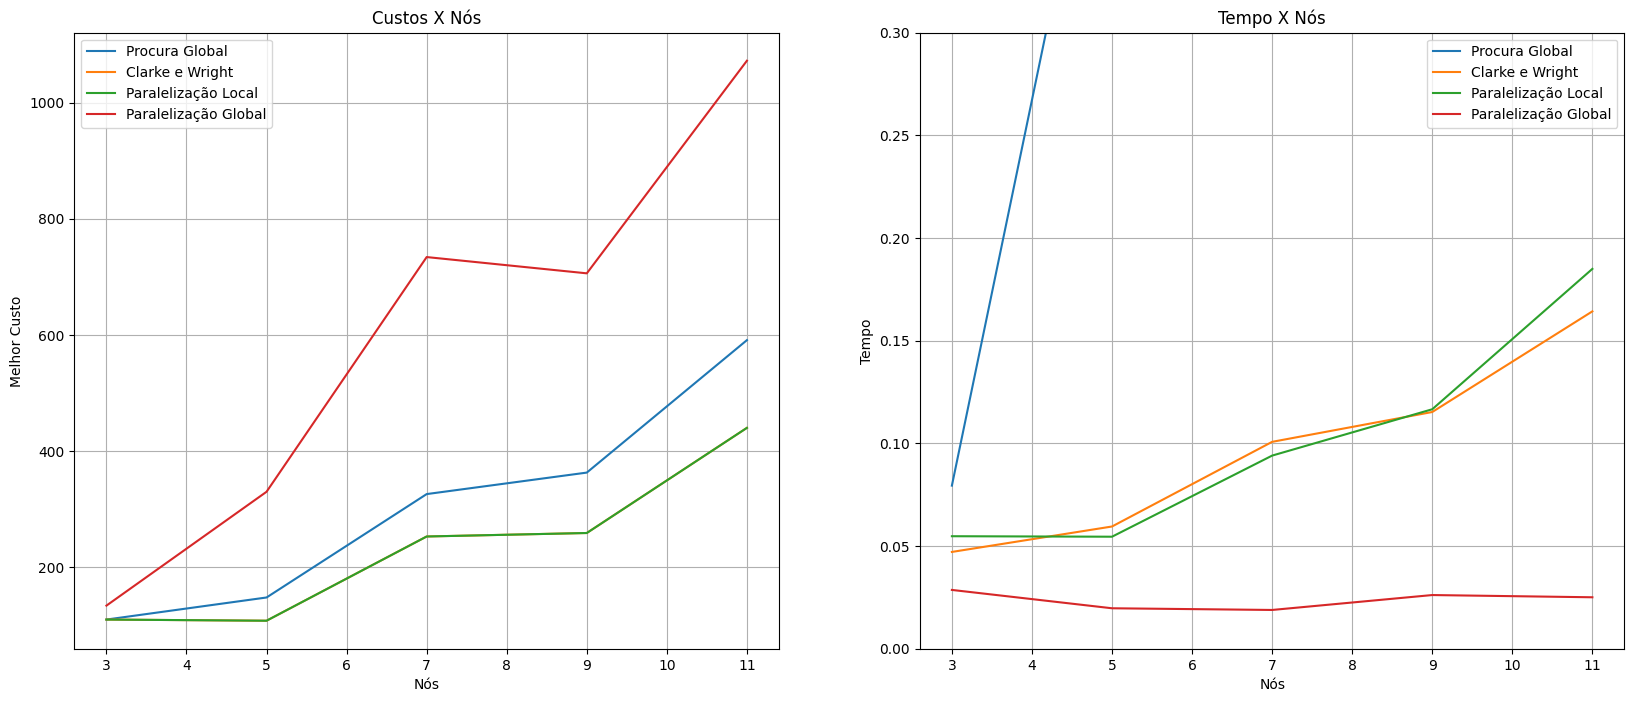

In [213]:
import matplotlib.pyplot as plt
import numpy as np

nos_grafos = [3, 5, 7, 9, 11]

ex1_custo_total = [110, 148, 326, 363, 591]
ex1_tempo_exec = [7.9428e-05, 0.000454946, 0.0324966, 2.59284, 526.096]
ex1_tempo_exec = list(map(lambda x: x * 1000, ex1_tempo_exec))

ex2_custo_total = [110, 108, 253, 259, 440]
ex2_tempo_exec = [4.7136e-05, 5.9525e-05, 0.000100753, 0.000115283, 0.000164301]
ex2_tempo_exec = list(map(lambda x: x * 1000, ex2_tempo_exec))

ex3_local_custo_total = [110, 108, 253, 259, 440]
ex3_local_tempo_exec = [5.4789e-05, 5.4552e-05, 9.4052e-05, 0.000116622, 0.000184985]
ex3_local_tempo_exec = list(map(lambda x: x * 1000, ex3_local_tempo_exec))

ex3_global_custo_total = [134, 330, 734, 706, 1072]
ex3_global_tempo_exec = [2.8633e-05, 1.97e-05, 1.8877e-05, 2.614e-05, 2.5055e-05]
ex3_global_tempo_exec = list(map(lambda x: x * 1000, ex3_global_tempo_exec))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(nos_grafos, ex1_custo_total, label='Procura Global')
plt.plot(nos_grafos, ex2_custo_total, label='Clarke e Wright')
plt.plot(nos_grafos, ex3_local_custo_total, label='Paralelização Local')
plt.plot(nos_grafos, ex3_global_custo_total, label='Paralelização Global')
plt.xlabel('Nós')
plt.ylabel('Melhor Custo')
plt.title('Custos X Nós')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(nos_grafos, ex1_tempo_exec, label='Procura Global')
plt.plot(nos_grafos, ex2_tempo_exec, label='Clarke e Wright')
plt.plot(nos_grafos, ex3_local_tempo_exec, label='Paralelização Local')
plt.plot(nos_grafos, ex3_global_tempo_exec, label='Paralelização Global')
plt.xlabel('Nós')
plt.ylabel('Tempo')
plt.title('Tempo X Nós')
plt.legend()
plt.grid(True)
plt.ylim(0, 3e-1)

plt.show()

## Critérios de avaliação

A correção do projeto levará em conta:

+ [Até 1 pontos] **Organização geral**
  - Organização do código fonte e/ou do notebook que centraliza seus códigos. Se a entrega for via jupyter notebook, ele deve conter células markdown que guiem a apreciação do trabalho. Caso seu código esteja organizado em arquivos ".cpp", ".py", etc, submeta também um relatório em PDF descrevendo seu trabalho;

+ [Até 4 pontos] **Implementações**
  - Sua entrega deve conter ao menos 3 implementações (uma para cada solução: exaustiva, OpenMP e MPI). Soluções extras nestas vertentes são encorajadas e serão valorizadas;
  - A parte de MPI deve ser obrigatoriamente executada no cluster. Portanto, submeta também os arquivos de configuração dos executáveis em batch;
  - Esperamos códigos seguindo as boas práticas de implementação e devidamente comentados;

+ [Até 3 pontos] **Avaliação de resultados**
  - Comparações das abordagens com tamanhos diferentes de grafos;
  - Clareza na comunicação dos resultados. Ex: gráficos e/ou pequenos textos que descrevem os resultados obtidos;
  - Justificativas: é esperado que a execução paralela seja mais rápida que a sequencial, assim como uma heurística seja mais rápida que a abordagem exaustiva. Caso seus resultados diferem do esperado, argumente potenciais causas;

+ [Até 1 ponto] **Extras**
  - A rubrica não cita o máximo de implementações a ser feita. Caso você opte por fazer algo além das 4 solicitadas, daremos até 1 ponto extra na nota do trabalho pelo esforço;


